# Test VAE training

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from ponyo import utils, train_vae_modules, simulate_expression_data

Using TensorFlow backend.


In [2]:
# Set seeds to get reproducible VAE trained models
train_vae_modules.set_all_seeds()

In [3]:
# Read in config variables
config_filename = "config_test_1.tsv"
params = utils.read_config(config_filename)

In [4]:
# Load parameters
local_dir = params["local_dir"]
raw_compendium_filename = params["raw_compendium_filename"]
normalized_compendium_filename = params["normalized_compendium_filename"]
training_stats_dir = params["training_stats_dir"]
vae_model_dir = params["vae_model_dir"]

In [5]:
assert os.path.exists(raw_compendium_filename)

## Setup directories

In [6]:
utils.setup_dir(config_filename)

In [7]:
# Check that directories were made correctly
assert os.path.isdir(training_stats_dir)
assert os.path.isdir(vae_model_dir)

## Pre-process data

In [8]:
train_vae_modules.normalize_expression_data(config_filename,
                                            raw_compendium_filename,
                                            normalized_compendium_filename)

input: dataset contains 56 samples and 5000 genes
Output: normalized dataset contains 56 samples and 5000 genes


## Train VAE

input dataset contains 56 samples and 5000 genes
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=() dtype=float32> beta
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50 samples, validate on 6 samples
Epoch 1/3
50/50 [==============================] - 5s 92ms/step - loss: 2954.7253 - kl_loss: 14.5329 - recons_loss: 2954.7253 - val_loss: 3356.3952 - val_kl_loss: 112.9899 - val_recons_loss: 3356.3953
Epoch 2/3
50/50 [==============================] - 4s 81ms/step - loss: 2655.9640 - kl_loss: 14.9158 - recons_loss: 2655.9639 - val_loss: 3487.3422 - val_kl_loss: 180.3130 - val_recons_loss: 3487.3420
Epoch 3/3
50/50 [==============================] - 4s 82ms/step - loss: 2599.8821 - kl_loss: 14.3563 - recons_loss: 2599.8821 - val_loss: 3444.1156 - val_kl_loss: 214.6160 - val_recons_loss: 3444.1155


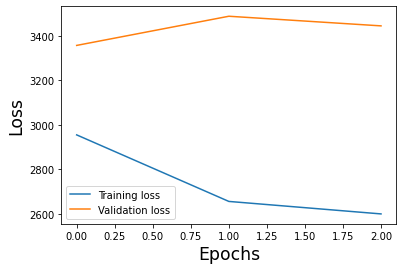

In [9]:
# Train VAE
train_vae_modules.train_vae(config_filename,
                            normalized_compendium_filename)

In [10]:
# Check reproducibility of VAE training
template_path = "data/test_vae_log.tsv"
output_path = "logs/tybalt_2layer_30latent_stats.tsv"
assert pd.read_csv(output_path, sep="\t")["val_loss"].values[-1] < 3500, pd.read_csv(output_path, sep="\t")["val_loss"].values[-1]